In [1]:
# https://www.dataquest.io/blog/python-pandas-databases/
import sqlite3

# Querying database rows in Python

In [3]:
with sqlite3.connect("flights.db") as conn:
    cur = conn.cursor()

    cur.execute("select * from airlines limit 5;")
    results = cur.fetchall()
    for row in results:
        print(row)

(0, '1', 'Private flight', '\\N', '-', None, None, None, 'Y')
(1, '2', '135 Airways', '\\N', None, 'GNL', 'GENERAL', 'United States', 'N')
(2, '3', '1Time Airline', '\\N', '1T', 'RNX', 'NEXTIME', 'South Africa', 'Y')
(3, '4', '2 Sqn No 1 Elementary Flying Training School', '\\N', None, 'WYT', None, 'United Kingdom', 'N')
(4, '5', '213 Flight Unit', '\\N', None, 'TFU', None, 'Russia', 'N')


# Mapping airports

In [42]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)

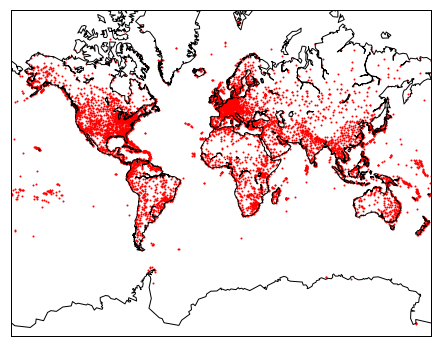

In [43]:
with sqlite3.connect("flights.db") as conn:
    cur = conn.cursor()
    coords = cur.execute("""
                         select 
                         cast(longitude as float), 
                         cast(latitude as float) 
                         from airports;
                         """
                         ).fetchall()
    
    m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80,
                llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')

    m.drawcoastlines()
    m.drawmapboundary()
    
    x, y = m([l[0] for l in coords], [l[1] for l in coords])
    m.scatter(x, y, 1, marker='o', color='red')
    
  

# Reading results into a pandas DataFrame

In [44]:
import pandas as pd
import sqlite3

In [45]:
with sqlite3.connect("flights.db") as conn:
    df = pd.read_sql_query("select * from airlines limit 5;", conn)

# Mapping routes

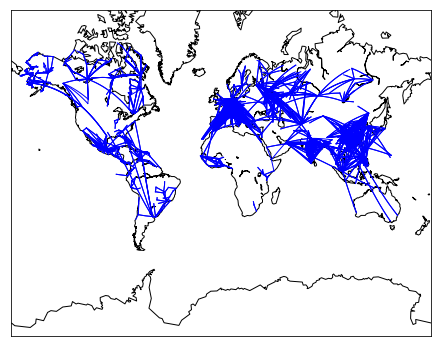

In [46]:
with sqlite3.connect("flights.db") as conn:
    routes = pd.read_sql_query("""
            select 
            cast(sa.longitude as float) as source_lon, 
            cast(sa.latitude as float) as source_lat,
            cast(da.longitude as float) as dest_lon,
            cast(da.latitude as float) as dest_lat
            from routes 
            inner join airports sa on
            sa.id = routes.source_id
            inner join airports da on
            da.id = routes.dest_id;""", 
            conn)
    
    m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80,
                llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')
    m.drawcoastlines()
    
    for name, row in routes[:3000].iterrows():
        if abs(row["source_lon"] - row["dest_lon"]) < 90:
            # Draw a great circle between source and dest airports.
            m.drawgreatcircle(
                row["source_lon"], 
                row["source_lat"], 
                row["dest_lon"],
                row["dest_lat"],
                linewidth=1,
                color='b'
            )